In [1]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco

In [2]:
fb = pdr.get_data_yahoo('FB')['2013-11-07':]
twtr = pdr.get_data_yahoo('TWTR')

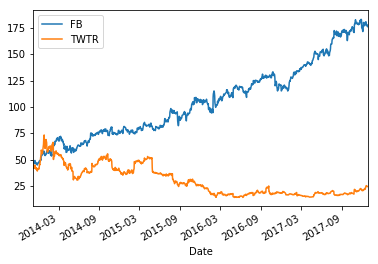

In [3]:
df = pd.DataFrame(data={
    'FB': fb['Close'],
    'TWTR': twtr['Close']
})

df.plot()
plt.show()

In [4]:
def cumulative_return(company, enter, leave):
    return df[company].loc[leave] / df[company].loc[enter]

In [5]:
cumulative_return('FB', '2013-11-07', '2013-11-29')

0.98843559738360809

In [6]:
cumulative_return('TWTR', '2013-11-07', '2017-01-03')

0.36614699928075733

In [7]:
cumulative_return('FB', '2013-11-07', '2014-11-07')

1.5895709926498951

In [8]:
def portfolio_cumulative_return(fb_p, twtr_p, enter, leave):
    fb_cr = fb_p * cumulative_return('FB', enter, leave)
    twtr_cr = twtr_p * cumulative_return('TWTR', enter, leave)
    return fb_cr + twtr_cr

In [9]:
portfolio_cumulative_return(0.5, 0.5, '2013-11-07', '2014-11-07')

1.2436719017197624

In [10]:
portfolio_cumulative_return(0.75, 0.25, '2013-11-07', '2014-11-07')

1.4166214471848289

In [11]:
portfolio_cumulative_return(0.25, 0.75, '2013-11-07', '2014-11-07')

1.0707223562546961

In [12]:
def f(x):
    return - portfolio_cumulative_return(x[0], x[1], '2013-11-07', '2014-11-07')

bounds = ((0, 1), (0, 1))
constraints = {'type': 'eq', 'fun': lambda x: x[0] + x[1] - 1}
result = sco.minimize(f, [0.5, 0.5], bounds=bounds, constraints=constraints)
result

     fun: -1.589570992649895
     jac: array([-1.589571 , -0.8977728])
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([ 1.,  0.])

In [13]:
portfolio_cumulative_return(result.x[0], result.x[1], '2013-11-07', '2014-11-07')

1.5895709926498951